# Supervised Learning : K- Nearest Neighbor (KNN)

# Developing the KNN algorithm from scratch without relying on libraries:

In [32]:
# Data manipulation imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

class KNN:

    def __init__(self, k):
        self.k=k
      

    def fit(self, X_train, X_test, y_train, y_test ):
        

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
             
        
    def predict(self):
        predictedLabels=[]
       
        for rec_test, recLabel_test in zip(self.X_test.itertuples(), self.y_test.items()): #to iterate over multiple iterables using zip 
           
            distance=[] 
            for rec_train, recLabel_train in zip(self.X_train.itertuples(), self.y_train.items()):
               
                dis = np.sqrt((rec_test[1] - rec_train[1])**2 + (rec_test[2]  - rec_train[2])**2 + (rec_test[3]  - rec_train[3])**2 + (rec_test[4]  - rec_train[4])**2)
                distance.append((dis, rec_test.Index, rec_train.Index, recLabel_train[1]))
                distance.sort(key=lambda x: x[0])
                k_nearestNeigh = distance[:int(self.k)] 
                
            counts = Counter([t[3] for t in k_nearestNeigh]) # Count the frequency of each element in the array
            most_common_label = counts.most_common(1)[0][0] # Get the most common element
            predictedLabels.append(most_common_label)

        self.predictedLabels=predictedLabels
                
        
    def accuracyCheck(self,setTest_size):
        correct=0
        for predictedLabel, recLabel_test in zip(self.predictedLabels, self.y_test.items()):
            if (predictedLabel==recLabel_test[1]):
                correct+=1
        accuracy=correct/setTest_size * 100 #test_size=10
        
        return accuracy

        

Utilizing the fruit_data_with_colors.csv dataset.

Reading and loading the data into the program.

Prepare the data by eliminating any features that contain text or categorical values. 

Address missing values by replacing them with the mean value of each    column, if necessary.


In [46]:

path = "fruit_data_with_colors _1_.csv"
data = pd.read_csv(path) #assumes data has header
df=pd.DataFrame(data)
df = df.select_dtypes(exclude=['object']) #excluding str dt columns
df=df.fillna(df.mean()) #handling missing values using mean
X = df[['mass',	'width', 'height', 'color_score']] #features
y = df['fruit_label'] #target class
#totalRecords: 60
setTrain_size=50
setTest_size=10
accuracyArr=[]

Dividing the data into training and testing sets, with the first 50 rows being used for training and the remaining 10 rows being used for testing.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=setTrain_size, test_size=setTest_size, random_state=80)
k=np.linspace(1,10)
k = np.round(k).astype(int)  # Round each value to the nearest integer and convert to integer data type

In [48]:
df.head()

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79


In [49]:
df.describe()

,fruit_label,mass,width,height,color_score
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.916667,762.039216,7.048333,7.711765,0.748167
std,1.139308,3846.169893,0.829844,1.337801,0.070555
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,2.000000,141.500000,6.275000,7.300000,0.717500
50%,3.000000,165.000000,7.200000,7.711765,0.730000
75%,4.000000,205.500000,7.325000,8.125000,0.790000
max,4.000000,30000.000000,9.600000,10.500000,0.930000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  60 non-null     int64  
 1   mass         60 non-null     float64
 2   width        60 non-null     float64
 3   height       60 non-null     float64
 4   color_score  60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


Applying the coded model for different values of K (ranging from 1 to 10) and examine the results.

In [51]:
#KNN algo. coded from scratch
for i in k:
    k1=KNN(i)
    k1.fit(X_train, X_test, y_train, y_test )
    k1.predict()
    accuracy=k1.accuracyCheck(setTest_size )
    accuracyArr.append(accuracy)




Plotting the accuracy score for each value of K, to visualize the differences.

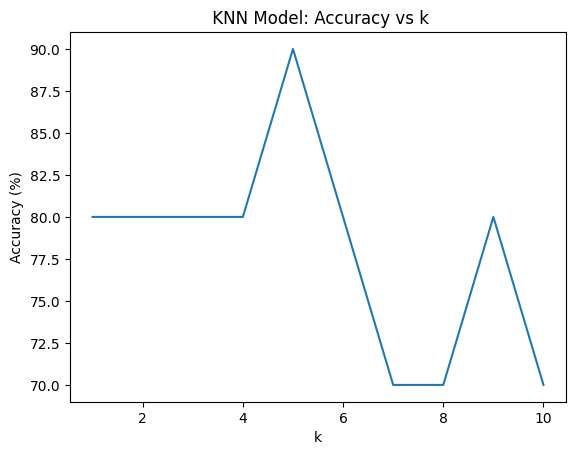

In [52]:
x = k
y = accuracyArr
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title(' KNN Model: Accuracy vs k')
plt.plot(x,y)

Applying the KNN model for different values of K (ranging from 1 to 10) and examine the results.


In [53]:
#Using KNeighborsClassifier()
accuracyArray=[]
for i in k:
    k1=KNeighborsClassifier(i)
    k1.fit(X_train, y_train) # Train the model using the fit method
    y_pred=k1.predict(X_test) 
    accuracy=accuracy_score(y_pred, y_test)
    accuracyArray.append(accuracy)


# Plotting the accuracy score for each value of K, to compare with its accuracy with our KNN model we coded from scratch and to visualize the differences

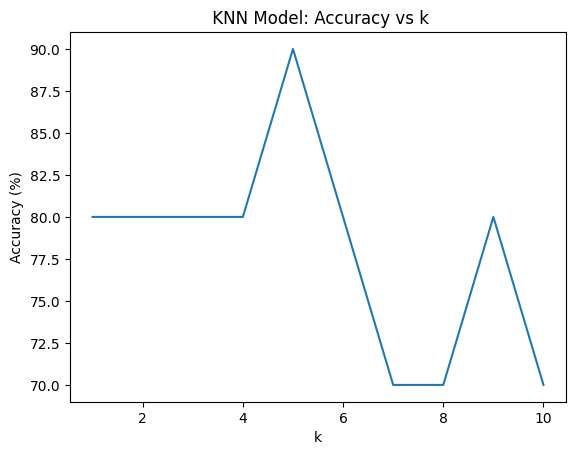

In [54]:
x = k
y = accuracyArr
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title(' KNN Model: Accuracy vs k')
plt.plot(x,y)